In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
train_data = pd.read_csv(r"./train.csv")
test_data = pd.read_csv(r"./test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Feature Engineering
def drop_not_concerned_columns(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned_columns(train_data, not_concerned_columns)
test_data = drop_not_concerned_columns(test_data, not_concerned_columns)

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [8]:
def clean_nan_columns(data, columns):
    for column in columns:
        print("start clean ", column)
        nan_column = np.isnan(data[column])
        if len(nan_column[nan_column]) != 0:
            data = data[nan_column != True]
        print("finish clean ", column)
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = clean_nan_columns(train_data, nan_columns)
print(len(train_data))
test_data = clean_nan_columns(test_data, nan_columns)
print(len(test_data))

start clean  Age
finish clean  Age
start clean  SibSp
finish clean  SibSp
start clean  Parch
finish clean  Parch
714
start clean  Age
finish clean  Age
start clean  SibSp
finish clean  SibSp
start clean  Parch
finish clean  Parch
332


In [9]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [10]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,0,0,1
1,1,female,38.0,1,0,1,0,0
2,1,female,26.0,0,0,0,0,1
3,1,female,35.0,1,0,1,0,0
4,0,male,35.0,0,0,0,0,1


In [11]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0,0,0,0,1
1,female,47.0,1,0,0,0,1
2,male,62.0,0,0,0,1,0
3,male,27.0,0,0,0,0,1
4,female,22.0,1,1,0,0,1


In [12]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


In [13]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1,0,0,0,1
1,1,0,0.472229,1,0,1,0,0
2,1,0,0.321438,0,0,0,0,1
3,1,0,0.434531,1,0,1,0,0
4,0,1,0.434531,0,0,0,0,1


In [14]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(571, 7)
train_y:(571, 1)
train_y content:[[1]
 [0]
 [0]]
valid_x:(143, 7)
valid_y:(143, 1)


In [15]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=5):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)

    fc = tf.layers.dense(inputs, hidden_units, activation=tf.nn.relu)
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()


In [16]:
epochs = 12000
train_print = 250
valid_print = 500
learning_rate_value = 0.0001

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        feed = {model.inputs: train_x,
                model.labels: train_y,
                model.learning_rate: learning_rate_value}

        train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
        if e % train_print == 0:
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Training Loss: {:.5f}".format(train_loss),
                  "Training Acc: {:.5f}".format(train_acc))
            x_collect.append(e)
            train_loss_collect.append(train_loss)
            train_acc_collect.append(train_acc)

            feed = {model.inputs: valid_x,
                    model.labels: valid_y}
            val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Validation Loss: {:.4f}".format(val_loss),
                  "Validation Acc: {:.4f}".format(val_acc))
            valid_loss_collect.append(val_loss)
            valid_acc_collect.append(val_acc)

    saver.save(sess, "./titanic.ckpt")

Epoch: 1/12000 Training Loss: 0.70128 Training Acc: 0.59720
Epoch: 1/12000 Validation Loss: 0.7134 Validation Acc: 0.5804


Epoch: 251/12000 Training Loss: 0.68249 Training Acc: 0.58494
Epoch: 251/12000 Validation Loss: 0.6900 Validation Acc: 0.5874


Epoch: 501/12000 Training Loss: 0.66672 Training Acc: 0.58494
Epoch: 501/12000 Validation Loss: 0.6709 Validation Acc: 0.5874


Epoch: 751/12000 Training Loss: 0.65153 Training Acc: 0.58494
Epoch: 751/12000 Validation Loss: 0.6522 Validation Acc: 0.6014


Epoch: 1001/12000 Training Loss: 0.63521 Training Acc: 0.59019
Epoch: 1001/12000 Validation Loss: 0.6317 Validation Acc: 0.5944


Epoch: 1251/12000 Training Loss: 0.61917 Training Acc: 0.60595
Epoch: 1251/12000 Validation Loss: 0.6102 Validation Acc: 0.6154


Epoch: 1501/12000 Training Loss: 0.60245 Training Acc: 0.64623
Epoch: 1501/12000 Validation Loss: 0.5864 Validation Acc: 0.6713


Epoch: 1751/12000 Training Loss: 0.58563 Training Acc: 0.69002
Epoch: 1751/12000 Validation Loss: 0.5613 Validation Acc: 0.7203


Epoch: 2001/12000 Training Loss: 0.56753 Training Acc: 0.74781
Epoch: 2001/12000 Validation Loss: 0.5339 Validation Acc: 0.8112


Epoch: 2251/12000 Training Loss: 0.55246 Training Acc: 0.76007
Epoch: 2251/12000 Validation Loss: 0.5110 Validation Acc: 0.8392


Epoch: 2501/12000 Training Loss: 0.53971 Training Acc: 0.76182
Epoch: 2501/12000 Validation Loss: 0.4915 Validation Acc: 0.8392


Epoch: 2751/12000 Training Loss: 0.52870 Training Acc: 0.76708
Epoch: 2751/12000 Validation Loss: 0.4743 Validation Acc: 0.8322


Epoch: 3001/12000 Training Loss: 0.51939 Training Acc: 0.76708
Epoch: 3001/12000 Validation Loss: 0.4592 Validation Acc: 0.8322


Epoch: 3251/12000 Training Loss: 0.51119 Training Acc: 0.76883
Epoch: 3251/12000 Validation Loss: 0.4458 Validation Acc: 0.8252


Epoch: 3501/12000 Training Loss: 0.50402 Training Acc: 0.76883
Epoch: 3501/12000 Validation Loss: 0.4342 Validation Acc: 0.8182


Epoch: 3751/12000 Training Loss: 0.49761 Training Acc: 0.77583
Epoch: 3751/12000 Validation Loss: 0.4238 Validation Acc: 0.8182


Epoch: 4001/12000 Training Loss: 0.49160 Training Acc: 0.78109
Epoch: 4001/12000 Validation Loss: 0.4143 Validation Acc: 0.8252


Epoch: 4251/12000 Training Loss: 0.48618 Training Acc: 0.78284
Epoch: 4251/12000 Validation Loss: 0.4057 Validation Acc: 0.8322


Epoch: 4501/12000 Training Loss: 0.48130 Training Acc: 0.78459
Epoch: 4501/12000 Validation Loss: 0.3979 Validation Acc: 0.8392


Epoch: 4751/12000 Training Loss: 0.47668 Training Acc: 0.78284
Epoch: 4751/12000 Validation Loss: 0.3905 Validation Acc: 0.8392


Epoch: 5001/12000 Training Loss: 0.47218 Training Acc: 0.78459
Epoch: 5001/12000 Validation Loss: 0.3827 Validation Acc: 0.8392


Epoch: 5251/12000 Training Loss: 0.46844 Training Acc: 0.78284
Epoch: 5251/12000 Validation Loss: 0.3763 Validation Acc: 0.8392


Epoch: 5501/12000 Training Loss: 0.46488 Training Acc: 0.78284
Epoch: 5501/12000 Validation Loss: 0.3705 Validation Acc: 0.8322


Epoch: 5751/12000 Training Loss: 0.46186 Training Acc: 0.78109
Epoch: 5751/12000 Validation Loss: 0.3651 Validation Acc: 0.8322


Epoch: 6001/12000 Training Loss: 0.45898 Training Acc: 0.78634
Epoch: 6001/12000 Validation Loss: 0.3608 Validation Acc: 0.8462


Epoch: 6251/12000 Training Loss: 0.45642 Training Acc: 0.78459
Epoch: 6251/12000 Validation Loss: 0.3558 Validation Acc: 0.8601


Epoch: 6501/12000 Training Loss: 0.45426 Training Acc: 0.78809
Epoch: 6501/12000 Validation Loss: 0.3520 Validation Acc: 0.8531


Epoch: 6751/12000 Training Loss: 0.45237 Training Acc: 0.78984
Epoch: 6751/12000 Validation Loss: 0.3488 Validation Acc: 0.8531


Epoch: 7001/12000 Training Loss: 0.45064 Training Acc: 0.78984
Epoch: 7001/12000 Validation Loss: 0.3459 Validation Acc: 0.8531


Epoch: 7251/12000 Training Loss: 0.44928 Training Acc: 0.78809
Epoch: 7251/12000 Validation Loss: 0.3432 Validation Acc: 0.8601


Epoch: 7501/12000 Training Loss: 0.44810 Training Acc: 0.78809
Epoch: 7501/12000 Validation Loss: 0.3413 Validation Acc: 0.8601


Epoch: 7751/12000 Training Loss: 0.44689 Training Acc: 0.78809
Epoch: 7751/12000 Validation Loss: 0.3400 Validation Acc: 0.8531


Epoch: 8001/12000 Training Loss: 0.44579 Training Acc: 0.79159
Epoch: 8001/12000 Validation Loss: 0.3389 Validation Acc: 0.8531


Epoch: 8251/12000 Training Loss: 0.44476 Training Acc: 0.79510
Epoch: 8251/12000 Validation Loss: 0.3366 Validation Acc: 0.8462


Epoch: 8501/12000 Training Loss: 0.44390 Training Acc: 0.79335
Epoch: 8501/12000 Validation Loss: 0.3347 Validation Acc: 0.8462


Epoch: 8751/12000 Training Loss: 0.44297 Training Acc: 0.79335
Epoch: 8751/12000 Validation Loss: 0.3328 Validation Acc: 0.8531


Epoch: 9001/12000 Training Loss: 0.44222 Training Acc: 0.79335
Epoch: 9001/12000 Validation Loss: 0.3306 Validation Acc: 0.8531


Epoch: 9251/12000 Training Loss: 0.44148 Training Acc: 0.79335
Epoch: 9251/12000 Validation Loss: 0.3291 Validation Acc: 0.8531


Epoch: 9501/12000 Training Loss: 0.44079 Training Acc: 0.79335
Epoch: 9501/12000 Validation Loss: 0.3276 Validation Acc: 0.8531


Epoch: 9751/12000 Training Loss: 0.44016 Training Acc: 0.79159
Epoch: 9751/12000 Validation Loss: 0.3261 Validation Acc: 0.8531


Epoch: 10001/12000 Training Loss: 0.43956 Training Acc: 0.79335
Epoch: 10001/12000 Validation Loss: 0.3248 Validation Acc: 0.8531


Epoch: 10251/12000 Training Loss: 0.43895 Training Acc: 0.79159
Epoch: 10251/12000 Validation Loss: 0.3236 Validation Acc: 0.8531


Epoch: 10501/12000 Training Loss: 0.43838 Training Acc: 0.79335
Epoch: 10501/12000 Validation Loss: 0.3225 Validation Acc: 0.8531


Epoch: 10751/12000 Training Loss: 0.43778 Training Acc: 0.79159
Epoch: 10751/12000 Validation Loss: 0.3208 Validation Acc: 0.8531


Epoch: 11001/12000 Training Loss: 0.43724 Training Acc: 0.79685
Epoch: 11001/12000 Validation Loss: 0.3198 Validation Acc: 0.8601


Epoch: 11251/12000 Training Loss: 0.43673 Training Acc: 0.80385
Epoch: 11251/12000 Validation Loss: 0.3188 Validation Acc: 0.8671


Epoch: 11501/12000 Training Loss: 0.43624 Training Acc: 0.80736
Epoch: 11501/12000 Validation Loss: 0.3179 Validation Acc: 0.8671


Epoch: 11751/12000 Training Loss: 0.43579 Training Acc: 0.81261
Epoch: 11751/12000 Validation Loss: 0.3172 Validation Acc: 0.8671


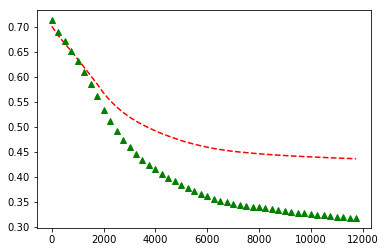

In [17]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

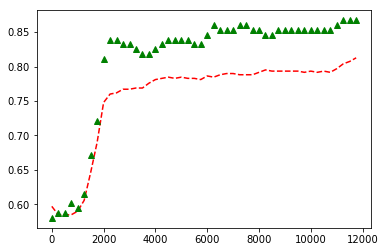

In [18]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()